# Problem set 2: k-nearest neighbours

In [134]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.neighbors import KNeighborsClassifier

Summary of the algorithm

https://towardsdatascience.com/getting-acquainted-with-k-nearest-neighbors-ba0a9ecf354f

## 2.1 Data preparation

Generate a dataset with $n_1=10$ points from $\mathcal{N}_2(\begin{bmatrix}1 \\ 0 \end{bmatrix}, \begin{bmatrix}1 & 0 \\ 0 & 1\end{bmatrix})$ distribution (labeled $0$) and $n_2=10$ points from $\mathcal{N}_2(\begin{bmatrix}5 \\ 2 \end{bmatrix}, \begin{bmatrix}5 & 1 \\ 1 & 1\end{bmatrix})$ distribution (labeled $1$). Plot it.

In [135]:
X0 = np.random.multivariate_normal([1,0],[[1,0],[0,1]], size = 10)
X1 = np.random.multivariate_normal([5,2],[[1,0],[0,1]], size = 10)
X0 

array([[ 2.53796825,  0.52584601],
       [ 0.35522732,  1.001586  ],
       [ 0.89321424,  0.995443  ],
       [ 0.94312558,  0.94795421],
       [ 1.42828989, -1.1049389 ],
       [ 1.2516096 ,  0.57084185],
       [ 1.21782352,  0.43615449],
       [-0.15781022, -0.71263798],
       [ 0.87144173, -0.88648323],
       [ 1.02047602,  1.5039394 ]])

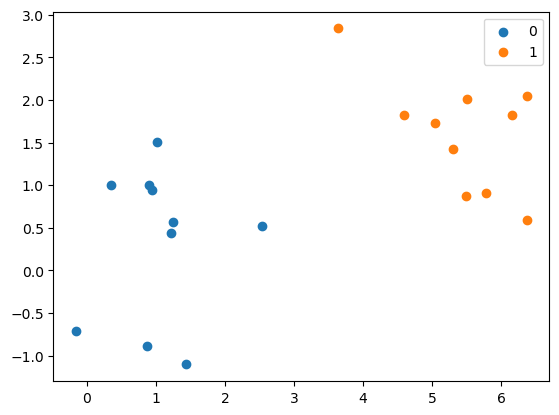

In [136]:
plt.scatter(X0[:,0],X0[:,1], label = '0')
plt.scatter(X1[:,0],X1[:,1], label = '1')
plt.legend()
plt.show()

## 2.2 KNN from scratch

Write a function `knn` that classify a datapoint $y$ based on $k\in (2\mathbb{N}+1)$ nearest points from a labeled dataset $X$. You can use `numpy.linalg.norm` to compute the distance. Use the structure of dataset $X$ from Problem 2.1.

In [137]:
def knn(X, y, k=5, norm = None):
# assuming the last column of X is the label
    new_df = pd.DataFrame(X)
    new_df['dist']=0
    y = np.array(y)

# calculating the distance from every point to y
    new_df['dist'] = np.linalg.norm(new_df.iloc[:, :-2].values - y, ord = norm, axis=1)  # Calculate Euclidean distance    
    new_df.sort_values(by='dist', ascending=True, inplace = True)
    
# determining the most probable neighbour
    knn_labels = new_df['label'][:k]
#     print('the k={} nearest neighbours are:{}'.format(k,new_df[:k]))
    
    predicted_label = np.argmax(np.bincount(knn_labels.astype(int)))

#     print('therefore label of y:{} is:{}'.format(y,predicted_label))
    
    return predicted_label

# preparing the 2.1 dataset
dataset_21 = np.vstack((X0,X1))
df = pd.DataFrame(dataset_21)
df['label'] = 0
df['label'][10:] = 1

# running knn
y = [0,0]
print(knn(df,y,k=5))

knn(df,[5,5],k=5)
knn(df,[2,3],k=5)

0


/var/folders/zy/jl2rn8kj7cx0g35_dvq0zksh0000gn/T/ipykernel_42387/426647688.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['label'][10:] = 1


0

## 2.3 Classification of an aritifical dataset

 Use the function from problem 2.2 to classify each point on the plane based on the dataset from 2.1. Plot the results.

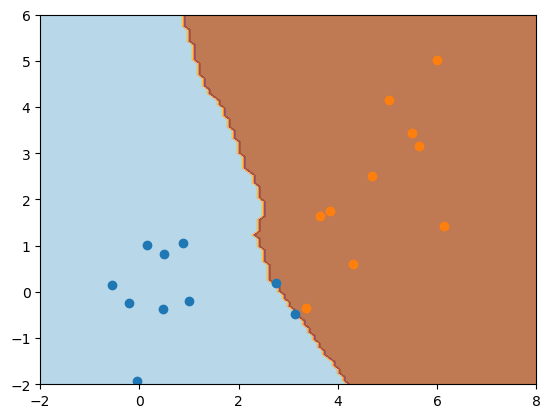

In [127]:
x = np.linspace(-2,8,100)
y = np.linspace(-2,6,100)
X,Y = np.meshgrid(x,y)
points = np.column_stack((X.ravel(), Y.ravel()))

classified_labels = np.array([knn(df,point) for point in points]).reshape(X.shape)

# plot the points in appropriate color
plt.contourf(X, Y, classified_labels, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points from dataset_21
plt.scatter(X0[:,0],X0[:,1], label = '0')
plt.scatter(X1[:,0],X1[:,1], label = '1')

plt.legend()
plt.show()

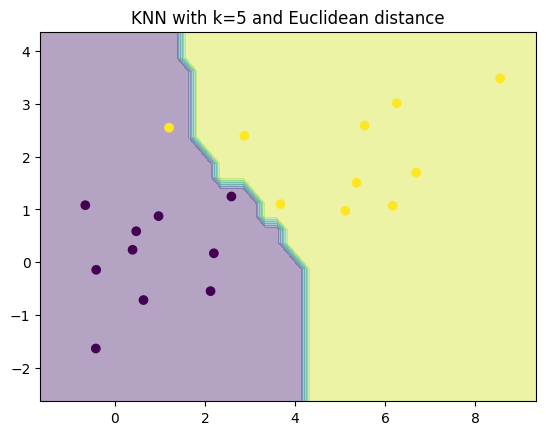

## 2.4 KNN in sklearn

Solve problem 2.3 with the help of `sklearn.neighbors.KNeighborsClassifier`.

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


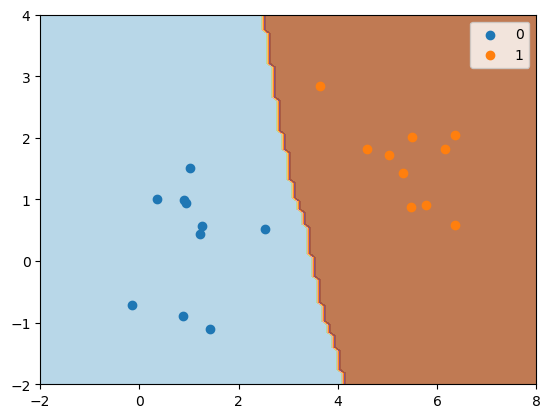

In [153]:
# df = df.drop(columns=df['dist'])

# Separate features and labels
X = df[[0,1]]
y = df['label']

# using the classifier
knn_classifier = KNeighborsClassifier(n_neighbors=5)

knn_classifier.fit(X, y)

# Create a grid of points on the 2D surface
x = np.linspace(-2, 8, 100)
y = np.linspace(-2, 4, 100)
X_mesh, Y_mesh = np.meshgrid(x, y)
points = np.column_stack((X_mesh.ravel(), Y_mesh.ravel()))

# Classify each point using the trained KNN classifier
classified_labels = knn_classifier.predict(points)

classified_labels = classified_labels.reshape(X_mesh.shape)

# Plot the results
plt.contourf(X_mesh, Y_mesh, classified_labels, cmap=plt.cm.Paired, alpha=0.8)

# Plot the data points from dataset_21
plt.scatter(X0[:,0],X0[:,1], label = '0')
plt.scatter(X1[:,0],X1[:,1], label = '1')

plt.legend()
plt.show()


# 2.5 Parameters impact

Check the impact of $k$ and the underlying metric on the results in problems 2.3/2.4.

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


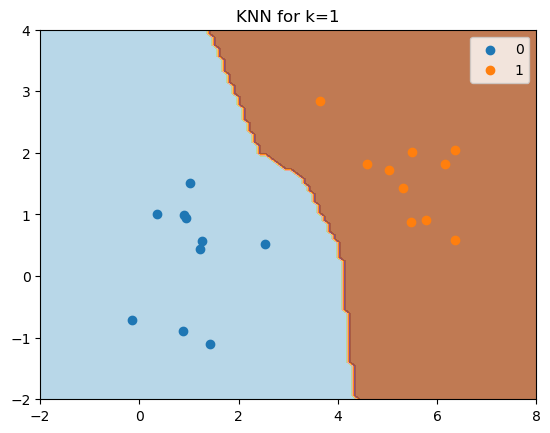

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


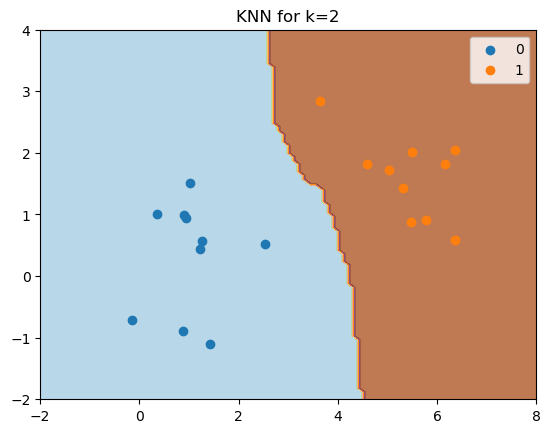

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


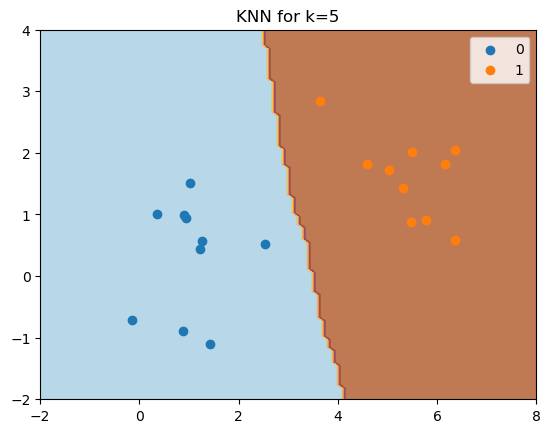

/Users/maja/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


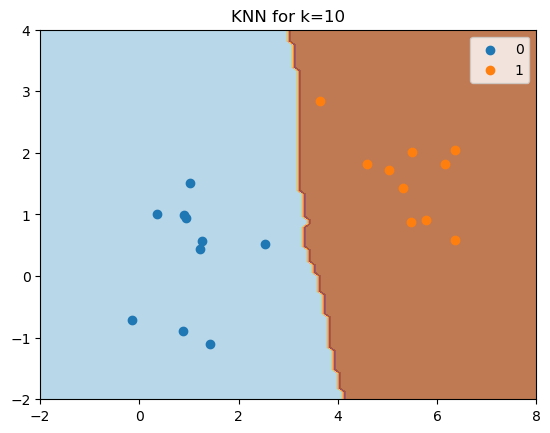

In [156]:
X = df[[0,1]]
y = df['label']

for k in [1,2,5,10]:
    knn_classifier = KNeighborsClassifier(n_neighbors=k)

    knn_classifier.fit(X, y)
    
    # Create a grid of points on the 2D surface
    X_mesh, Y_mesh = np.meshgrid(np.linspace(-2, 8, 100),np.linspace(-2, 4, 100))
    points = np.column_stack((X_mesh.ravel(), Y_mesh.ravel()))

    # Classify each point using the trained KNN classifier
    classified_labels = knn_classifier.predict(points)

    classified_labels = classified_labels.reshape(X_mesh.shape)

    # Plot the results
    plt.contourf(X_mesh, Y_mesh, classified_labels, cmap=plt.cm.Paired, alpha=0.8)

    # Plot the data points from dataset_21
    plt.scatter(X0[:,0],X0[:,1], label = '0')
    plt.scatter(X1[:,0],X1[:,1], label = '1')
    
    plt.title('KNN for k={}'.format(k))
    plt.legend()
    plt.show()


c:\Users\Damian\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


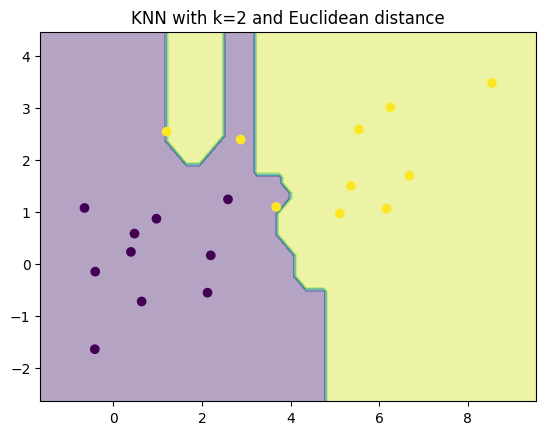

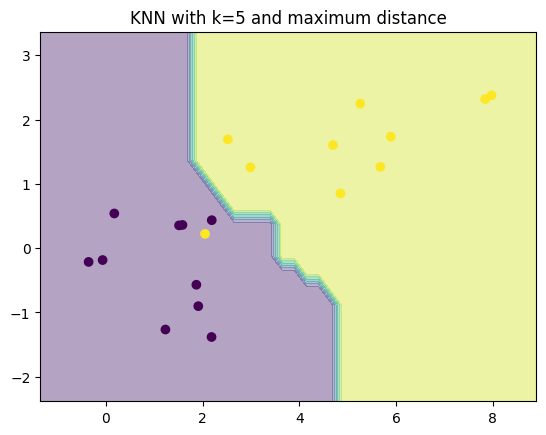